In [1]:
import os, time
from scipy import stats
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
os.getcwd()

'D:\\soundcast\\scripts\\summarize\\notebooks'

In [3]:
# Create timestamp to show when this summary was run
print 'Summary run: ' + time.strftime("%a, %d %b %Y %H:%M")

Summary run: Wed, 01 Apr 2020 16:36


In [4]:
pd.options.display.float_format = '{:0,.2f}'.format
format_percent = "{:,.2%}".format
relative_path = '../../../outputs'

# Commute Mode by Workplace Geography

In [5]:
df = pd.read_csv(os.path.join(relative_path,'validation','acs_commute_share_by_workplace_geog.csv'))

# Add mode share by work_place field
_df = df.groupby('work_place').sum()[['modeled','observed']].reset_index()
_df = _df.merge(df, on='work_place', suffixes=['_geog_total','_mode_total'])
_df['observed_mode_share'] = _df['observed_mode_total']/_df['observed_geog_total']
_df['modeled_mode_share'] = _df['modeled_mode_total']/_df['modeled_geog_total']
_df[['work_place','mode','modeled_mode_total','observed_mode_total','percent_diff','diff','modeled_mode_share','observed_mode_share']]

,work_place,mode,modeled_mode_total,observed_mode_total,percent_diff,diff,modeled_mode_share,observed_mode_share
0,Auburn,auto,33892,33431,0.01,461,0.93,0.94
1,Auburn,transit,1176,691,0.70,485,0.03,0.02
2,Auburn,walk_and_bike,1507,1355,0.11,152,0.04,0.04
3,Bellevue,auto,85042,96761,-0.12,-11719,0.83,0.84
4,Bellevue,transit,11141,12505,-0.11,-1364,0.11,0.11
5,Bellevue,walk_and_bike,6151,6464,-0.05,-313,0.06,0.06
6,Everett,auto,60470,81741,-0.26,-21271,0.89,0.92
7,Everett,transit,3522,2766,0.27,756,0.05,0.03
8,Everett,walk_and_bike,4004,3961,0.01,43,0.06,0.04
9,Federal Way,auto,22577,27590,-0.18,-5013,0.89,0.93


r^2 : 0.962222067742


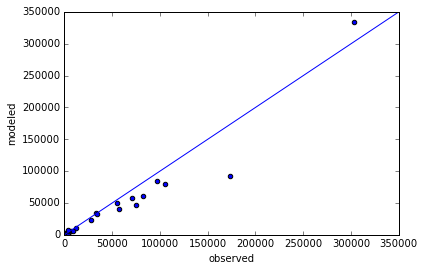

In [6]:
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2 : ' + str(r_value)

# Commute Mode Shares by Work Place
----

In [7]:
df_tot = df.groupby(['work_place']).sum()[['modeled','observed']].reset_index()
df_shares = df.merge(df_tot, on='work_place', suffixes=['','_total'])
df_shares['mode_share_modeled'] = df_shares['modeled']/df_shares['modeled_total']
df_shares['mode_share_observed'] = df_shares['observed']/df_shares['observed_total']
df_shares.rename(columns={'mode_share_modeled': 'modeled', 'mode_share_observed': 'observed',
                         'modeled': '_', 'observed': '__'}, inplace=True)
df_shares = df_shares[['work_place','modeled','observed','mode']]
df_shares['percent_diff'] = (df_shares['modeled']-df_shares['observed'])/df_shares['observed']
df_shares['diff'] = df_shares['modeled']-df_shares['observed']

## Auto

In [8]:
_df = df_shares[df_shares['mode'] == 'auto']
_df

,work_place,modeled,observed,mode,percent_diff,diff
0,Auburn,0.93,0.94,auto,-0.02,-0.02
3,Bellevue,0.83,0.84,auto,-0.01,-0.01
6,Everett,0.89,0.92,auto,-0.04,-0.03
9,Federal Way,0.89,0.93,auto,-0.05,-0.04
12,Kent,0.92,0.92,auto,-0.01,-0.01
15,Kirkland,0.89,0.87,auto,0.02,0.02
18,Redmond,0.87,0.85,auto,0.02,0.02
21,Renton,0.89,0.91,auto,-0.01,-0.01
24,Seattle,0.71,0.55,auto,0.28,0.16
27,Tacoma,0.86,0.94,auto,-0.09,-0.08


r^2 : 0.942891133291


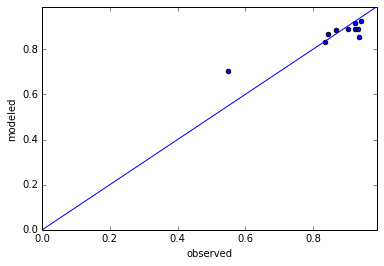

In [9]:
ax = _df.plot(kind='scatter', x='observed', y='modeled')
lim = _df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
print 'r^2 : ' + str(r_value)

## Transit

In [10]:
_df = df_shares[df_shares['mode'] == 'transit']
_df

,work_place,modeled,observed,mode,percent_diff,diff
1,Auburn,0.03,0.02,transit,0.65,0.01
4,Bellevue,0.11,0.11,transit,0.01,0.00
7,Everett,0.05,0.03,transit,0.66,0.02
10,Federal Way,0.06,0.00,transit,14.33,0.05
13,Kent,0.04,0.05,transit,-0.14,-0.01
16,Kirkland,0.05,0.09,transit,-0.41,-0.04
19,Redmond,0.09,0.11,transit,-0.15,-0.02
22,Renton,0.06,0.04,transit,0.35,0.01
25,Seattle,0.19,0.32,transit,-0.38,-0.12
28,Tacoma,0.06,0.03,transit,1.01,0.03


r^2 : 0.947476265234


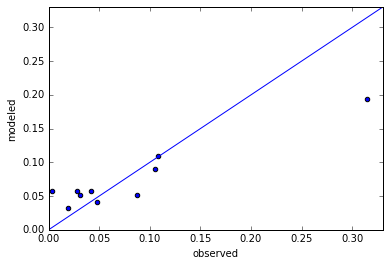

In [11]:
ax = _df.plot(kind='scatter', x='observed', y='modeled')
lim = _df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
print 'r^2 : ' + str(r_value)

## Walk and Bike

In [12]:
_df = df_shares[df_shares['mode'] == 'walk_and_bike']
_df

,work_place,modeled,observed,mode,percent_diff,diff
2,Auburn,0.04,0.04,walk_and_bike,0.08,0.00
5,Bellevue,0.06,0.06,walk_and_bike,0.08,0.00
8,Everett,0.06,0.04,walk_and_bike,0.32,0.01
11,Federal Way,0.05,0.06,walk_and_bike,-0.17,-0.01
14,Kent,0.04,0.03,walk_and_bike,0.55,0.02
17,Kirkland,0.06,0.05,walk_and_bike,0.40,0.02
20,Redmond,0.04,0.05,walk_and_bike,-0.09,-0.00
23,Renton,0.05,0.05,walk_and_bike,-0.03,-0.00
26,Seattle,0.10,0.14,walk_and_bike,-0.26,-0.04
29,Tacoma,0.09,0.03,walk_and_bike,1.46,0.05


r^2 : 0.673211991875


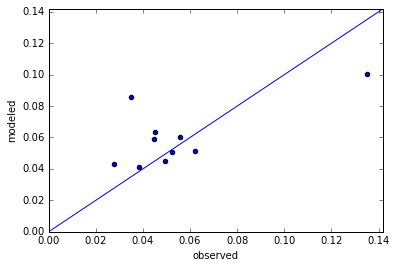

In [13]:
ax = _df.plot(kind='scatter', x='observed', y='modeled')
lim = _df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
print 'r^2 : ' + str(r_value)

# Commute Mode Share by Home Tract
----

In [14]:
df = pd.read_csv(os.path.join(relative_path,'validation','acs_commute_share_by_home_tract.csv'))
pd.options.display.float_format = '{:0,.0f}'.format

In [15]:
df_county = df.groupby('CountyName').sum()[['modeled','observed']].reset_index()
df_county

,CountyName,modeled,observed
0,King,"1,024,953","1,046,634"
1,Kitsap,"92,950","111,939"
2,Pierce,"236,726","366,388"
3,Snohomish,"231,215","367,904"


In [16]:
def calculate_shares(df, geog_col, apply_format=False):
    
    df[['modeled','observed']] = df[['modeled','observed']].astype('int')
    df_total = df.groupby(geog_col).sum()[['modeled','observed']].reset_index()
    df_total.rename(columns={'modeled': 'modeled_total','observed':'observed_total'}, inplace=True)
    df = df.merge(df_total, on=geog_col, how='left')
    df['modeled_share'] = df['modeled']*1.0/df['modeled_total']
    df['observed_share'] = df['observed']*1.0/df['observed_total']
    if apply_format:
        df[['modeled_share','observed_share']] = df[['modeled_share','observed_share']].applymap(format_percent)
    
    return df

In [17]:
df_county_mode = df.groupby(['CountyName','mode']).sum()[['modeled','observed']].reset_index()
df_county_mode = calculate_shares(df_county_mode, 'CountyName', apply_format=True)
# Shares by Tract
df_tract = df[['geoid','mode','modeled','observed']]
df_tract_shares = calculate_shares(df_tract, 'geoid')

C:\Anaconda\envs\model\lib\site-packages\pandas\core\frame.py:2378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


## SOV

 r^2: 0.763631649076


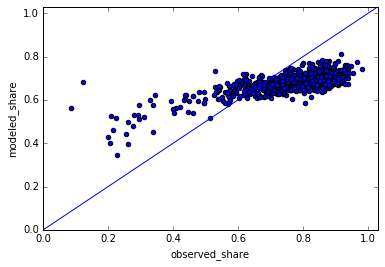

In [18]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'SOV']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print ' r^2: ' + str(r_value)

## HOV

 r^2: 0.249224546798


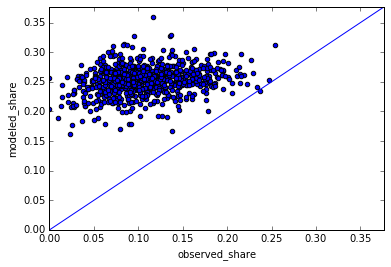

In [19]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'HOV']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print ' r^2: ' + str(r_value)

## Transit

 r^2: 0.686829101001


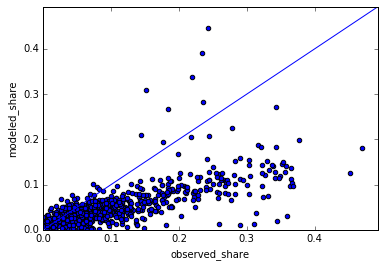

In [20]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'Transit']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print ' r^2: ' + str(r_value)

## Walk

 r^2: 0.539850920188


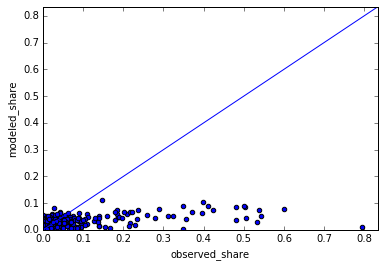

In [21]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'Walk']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print ' r^2: ' + str(r_value)

# Commute Flow
----

In [22]:
df = pd.read_csv(os.path.join(relative_path,'validation','district_worker_flows.csv'))
# Load district names
df_lookup = pd.read_csv(r'../../../inputs/model/lookup/TAZ_TAD_County.csv')

In [23]:
df = df.merge(df_lookup[['District','New DistrictName']], left_on='District_o', right_on='District')
df.rename(columns={'New DistrictName': 'Origin District'}, inplace=True)
df = df.merge(df_lookup[['District','New DistrictName']], left_on='District_d', right_on='District')
df.rename(columns={'New DistrictName': 'Destination District'}, inplace=True)
df = df[['District_o','District_d','Origin District','Destination District','modeled','observed']]

r^2 : 0.993459755085


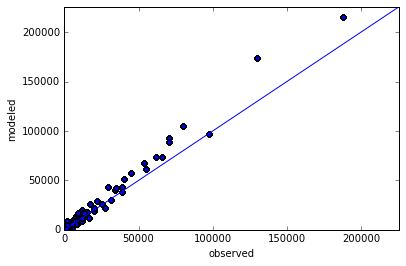

In [24]:
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2 : ' + str(r_value)

Modeled

In [25]:
df_m = pd.pivot_table(df, index='Origin District', columns='Destination District', values='modeled')
df_m

Destination District,East Side,Everett-Lynwood-Edmonds,Kitsap,North Seattle-Shoreline,Renton-FedWay-Kent,S.Kitsap,Seattle CBD,South Pierce,Suburban Snohomish,Tacoma,West-South Seattle
Origin District,,,,,,,,,,,
East Side,"215,081","9,352",26,"16,404","29,469",17,"37,757",903,"9,869",916,"14,593"
Everett-Lynwood-Edmonds,"16,976","73,354",28,"17,469","1,750",2,"11,999",48,"17,556",65,"2,917"
Kitsap,58,40,"105,011",93,90,"4,429",867,100,7,234,126
North Seattle-Shoreline,"19,413","11,205",28,"73,344","5,619",3,"67,338",145,"3,154",180,"12,117"
Renton-FedWay-Kent,"29,973",855,95,"6,136","173,919",167,"22,227","14,555",510,"14,016","25,627"
S.Kitsap,47,3,"8,789",24,335,"17,322",48,583,nan,"1,200",57
Seattle CBD,"11,509","1,479",43,"19,933","5,837",3,"89,276",129,461,176,"14,618"
South Pierce,"4,487",173,400,"1,114","41,971","1,141","3,453","97,409",88,"51,104","4,044"
Suburban Snohomish,"42,955","61,826",12,"13,066","2,505",1,"9,360",75,"92,631",67,"2,710"


Observed

In [26]:
df_o = pd.pivot_table(df, index='Origin District', columns='Destination District', values='observed')
df_o

Destination District,East Side,Everett-Lynwood-Edmonds,Kitsap,North Seattle-Shoreline,Renton-FedWay-Kent,S.Kitsap,Seattle CBD,South Pierce,Suburban Snohomish,Tacoma,West-South Seattle
Origin District,,,,,,,,,,,
East Side,"188,214","8,517",228,"10,654","21,988",28,"38,816",993,"5,873",987,"13,125"
Everett-Lynwood-Edmonds,"12,574","61,446",340,"11,647","3,489",10,"11,955",296,"15,234",201,"3,255"
Kitsap,"1,306",691,"80,004",783,"1,809","1,621","4,958","1,180",64,"2,328","2,014"
North Seattle-Shoreline,"19,816","9,453",343,"66,117","7,768",55,"53,446",361,"3,151",459,"11,591"
Renton-FedWay-Kent,"31,684","2,619",281,"8,182","129,832",255,"27,571","9,139",780,"7,790","25,502"
S.Kitsap,307,60,"1,973",224,"1,448","9,108",417,"3,105",nan,"5,255",577
Seattle CBD,"16,628","2,025",159,"11,996","5,284",10,"70,449",274,580,520,"8,607"
South Pierce,"4,515",669,"1,186","1,386","34,551","1,347","5,725","97,602",270,"39,995","5,321"
Suburban Snohomish,"29,472","54,721",261,"8,918","4,840",23,"12,011",473,"70,611",344,"4,306"


Difference

In [27]:
df_m - df_o

Destination District,East Side,Everett-Lynwood-Edmonds,Kitsap,North Seattle-Shoreline,Renton-FedWay-Kent,S.Kitsap,Seattle CBD,South Pierce,Suburban Snohomish,Tacoma,West-South Seattle
Origin District,,,,,,,,,,,
East Side,"26,867",835,-202,"5,750","7,481",-11,"-1,059",-90,"3,996",-71,"1,468"
Everett-Lynwood-Edmonds,"4,402","11,908",-312,"5,822","-1,739",-8,44,-248,"2,322",-136,-338
Kitsap,"-1,248",-651,"25,007",-690,"-1,719","2,808","-4,091","-1,080",-57,"-2,094","-1,888"
North Seattle-Shoreline,-403,"1,752",-315,"7,227","-2,149",-52,"13,892",-216,3,-279,526
Renton-FedWay-Kent,"-1,711","-1,764",-186,"-2,046","44,087",-88,"-5,344","5,416",-270,"6,226",125
S.Kitsap,-260,-57,"6,816",-200,"-1,113","8,214",-369,"-2,522",nan,"-4,055",-520
Seattle CBD,"-5,119",-546,-116,"7,937",553,-7,"18,827",-145,-119,-344,"6,011"
South Pierce,-28,-496,-786,-272,"7,420",-206,"-2,272",-193,-182,"11,109","-1,277"
Suburban Snohomish,"13,483","7,105",-249,"4,148","-2,335",-22,"-2,651",-398,"22,020",-277,"-1,596"


Percent Difference

In [28]:
pd.options.display.float_format = '{:0,.2f}'.format
(df_m - df_o)/df_o

Destination District,East Side,Everett-Lynwood-Edmonds,Kitsap,North Seattle-Shoreline,Renton-FedWay-Kent,S.Kitsap,Seattle CBD,South Pierce,Suburban Snohomish,Tacoma,West-South Seattle
Origin District,,,,,,,,,,,
East Side,0.14,0.10,-0.89,0.54,0.34,-0.39,-0.03,-0.09,0.68,-0.07,0.11
Everett-Lynwood-Edmonds,0.35,0.19,-0.92,0.50,-0.50,-0.80,0.00,-0.84,0.15,-0.68,-0.10
Kitsap,-0.96,-0.94,0.31,-0.88,-0.95,1.73,-0.83,-0.92,-0.89,-0.90,-0.94
North Seattle-Shoreline,-0.02,0.19,-0.92,0.11,-0.28,-0.95,0.26,-0.60,0.00,-0.61,0.05
Renton-FedWay-Kent,-0.05,-0.67,-0.66,-0.25,0.34,-0.35,-0.19,0.59,-0.35,0.80,0.00
S.Kitsap,-0.85,-0.95,3.45,-0.89,-0.77,0.90,-0.88,-0.81,nan,-0.77,-0.90
Seattle CBD,-0.31,-0.27,-0.73,0.66,0.10,-0.70,0.27,-0.53,-0.21,-0.66,0.70
South Pierce,-0.01,-0.74,-0.66,-0.20,0.21,-0.15,-0.40,-0.00,-0.67,0.28,-0.24
Suburban Snohomish,0.46,0.13,-0.95,0.47,-0.48,-0.96,-0.22,-0.84,0.31,-0.81,-0.37
